In [52]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

In [53]:
ratings_df = pd.read_csv('./data/movie_ratings.csv')
ratings_df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [54]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212595 non-null  int64  
 1   movie_id     212595 non-null  int64  
 2   rating       212595 non-null  int64  
 3   timestamp    212595 non-null  object 
 4   age          212595 non-null  int64  
 5   gender       212595 non-null  object 
 6   occupation   212595 non-null  object 
 7   zip_code     212595 non-null  object 
 8   title        212595 non-null  object 
 9   year         212559 non-null  float64
 10  decade       212559 non-null  float64
 11  genres       212595 non-null  object 
 12  rating_year  212595 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 21.1+ MB


In [55]:
# convert 'timestamp' column to datetime and format as YYYY-MM-DD
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])
ratings_df.head()

,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,title,year,decade,genres,rating_year
0,196,242,3,1997-12-04 15:55:49,49,M,writer,55105,Kolya (1996),1996.0,1990.0,Comedy,1997
1,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Crime,1998
2,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Film-Noir,1998
3,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Mystery,1998
4,186,302,3,1998-04-04 19:22:22,39,F,executive,00000,L.A. Confidential (1997),1997.0,1990.0,Thriller,1998


In [56]:
ratings_df['gender'] = ratings_df['gender'].astype('category')
ratings_df = ratings_df.rename(columns={'genres': 'genre'})
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212595 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      212595 non-null  int64         
 1   movie_id     212595 non-null  int64         
 2   rating       212595 non-null  int64         
 3   timestamp    212595 non-null  datetime64[ns]
 4   age          212595 non-null  int64         
 5   gender       212595 non-null  category      
 6   occupation   212595 non-null  object        
 7   zip_code     212595 non-null  object        
 8   title        212595 non-null  object        
 9   year         212559 non-null  float64       
 10  decade       212559 non-null  float64       
 11  genre        212595 non-null  object        
 12  rating_year  212595 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 19.7+ MB


In [57]:
ratings_df['year'].value_counts().sort_values(ascending=False)

year
1996.0    37505
1997.0    33760
1995.0    25229
1994.0    18046
1993.0    12778
          ...  
1943.0       45
1936.0       39
1932.0       24
1930.0       18
1926.0        2
Name: count, Length: 71, dtype: int64

In [ ]:
ratings_df = ratings_df[~ratings_df['year'].isin(['nan', '', '-', ' '])]
ratings_df = ratings_df[ratings_df['year'].notna()]
ratings_df['year'] = ratings_df['year'].astype(float).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 212559 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      212559 non-null  int64         
 1   movie_id     212559 non-null  int64         
 2   rating       212559 non-null  int64         
 3   timestamp    212559 non-null  datetime64[ns]
 4   age          212559 non-null  int64         
 5   gender       212559 non-null  category      
 6   occupation   212559 non-null  object        
 7   zip_code     212559 non-null  object        
 8   title        212559 non-null  object        
 9   year         212559 non-null  int64         
 10  decade       212559 non-null  float64       
 11  genre        212559 non-null  object        
 12  rating_year  212559 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 21.3+ MB


<Axes: xlabel='year'>

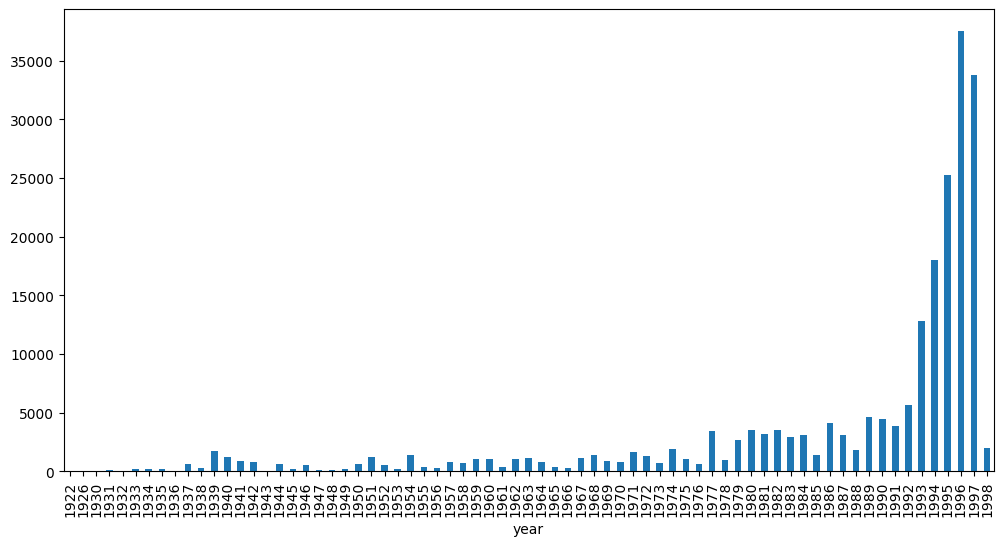

In [59]:
ratings_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

In [61]:
ratings_df.info()
ratings_df.to_csv('./data/cleaned_movie_ratings.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 212559 entries, 0 to 212594
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      212559 non-null  int64         
 1   movie_id     212559 non-null  int64         
 2   rating       212559 non-null  int64         
 3   timestamp    212559 non-null  datetime64[ns]
 4   age          212559 non-null  int64         
 5   gender       212559 non-null  category      
 6   occupation   212559 non-null  object        
 7   zip_code     212559 non-null  object        
 8   title        212559 non-null  object        
 9   year         212559 non-null  int64         
 10  decade       212559 non-null  float64       
 11  genre        212559 non-null  object        
 12  rating_year  212559 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 21.3+ MB


In [62]:
cleaned_movie_ratings_df = pd.read_csv('./data/cleaned_movie_ratings.csv')
cleaned_movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212559 entries, 0 to 212558
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      212559 non-null  int64  
 1   movie_id     212559 non-null  int64  
 2   rating       212559 non-null  int64  
 3   timestamp    212559 non-null  object 
 4   age          212559 non-null  int64  
 5   gender       212559 non-null  object 
 6   occupation   212559 non-null  object 
 7   zip_code     212559 non-null  object 
 8   title        212559 non-null  object 
 9   year         212559 non-null  int64  
 10  decade       212559 non-null  float64
 11  genre        212559 non-null  object 
 12  rating_year  212559 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 21.1+ MB
